# Problem Statement

Predict whether a driver will be leaving the company or not based on their attributes like

    - Demographics (city, age, gender etc.)
    - Tenure information (joining date, Last Date)
    - Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv")

In [4]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
df.shape

(19104, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [8]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [9]:
lis=['City','Grade','Joining Designation','Education_Level','Gender','Quarterly Rating']

for i in lis:
    print(i, ': ',df[i].unique())
    print()

City :  ['C23' 'C7' 'C13' 'C9' 'C11' 'C2' 'C19' 'C26' 'C20' 'C17' 'C29' 'C10'
 'C24' 'C14' 'C6' 'C28' 'C5' 'C18' 'C27' 'C15' 'C8' 'C25' 'C21' 'C1' 'C4'
 'C3' 'C16' 'C22' 'C12']

Grade :  [1 2 3 4 5]

Joining Designation :  [1 2 3 4 5]

Education_Level :  [2 0 1]

Gender :  [ 0.  1. nan]

Quarterly Rating :  [2 1 4 3]



## Data Preprocessing-1

### Dropping unwanted column

In [10]:
df.drop(columns='Unnamed: 0',inplace=True)

### KNN Imputing Data-Handling Missing Value

In [11]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

Presence of null value. To be handled

In [12]:
immuting_df=df.drop(columns=['MMM-YY','LastWorkingDate','Dateofjoining','City'])

In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)


In [14]:
col=immuting_df.columns
immuting_df=imputer.fit_transform(immuting_df)
immuting_df=pd.DataFrame(immuting_df,columns=col)

In [15]:
df['Age']=immuting_df['Age']

In [16]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

### Label Encoding of city

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df['City']=le.fit_transform(df['City'])

In [19]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,15,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,15,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,15,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,26,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,26,2,67016,11/06/20,NaN,2,2,0,1


### Coverting to date time

In [20]:
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])

In [21]:
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])

In [22]:
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

### Aggregating at drivers level

In [23]:
agg={
    'Age':['max'],
    'Gender':["first"],
    'City':["first"],
    'Education_Level':['last'],
    'Income':['mean'],
    'Dateofjoining':['min'],
    'LastWorkingDate':['max'],
    'Joining Designation':['min'],
    'Grade':['max'],
    'Total Business Value':['sum'],
    'Quarterly Rating':['mean']
    
}

In [24]:
groups = df.groupby('Driver_ID')

In [25]:
df_grp = df.groupby(by='Driver_ID', as_index=False).aggregate(agg)
df_grp.columns = df_grp.columns.droplevel(level=1)

In [26]:
#df.drop(columns='Driver_ID',inplace=True)

In [27]:
df_grp.head(10)

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,15,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.00000
1,2,31.0,0.0,26,2,67016.0,2020-11-06,NaT,2,2,0,1.00000
2,4,43.0,0.0,4,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.00000
3,5,29.0,0.0,28,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.00000
4,6,31.0,1.0,2,1,78728.0,2020-07-31,NaT,3,3,1265000,1.60000
5,8,34.0,0.0,11,0,70656.0,2020-09-19,2020-11-15,3,3,0,1.00000
6,11,28.0,1.0,10,2,42172.0,2020-12-07,NaT,1,1,0,1.00000
7,12,35.0,0.0,15,2,28116.0,2019-06-29,2019-12-21,1,1,2607180,2.50000
8,13,31.0,0.0,10,2,119227.0,2015-05-28,2020-11-25,1,4,10213040,1.26087
9,14,39.0,1.0,18,0,19734.0,2020-10-16,NaT,3,3,0,1.00000


#### Creating a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

In [28]:
df_grp['Rating_Increase']=0

In [29]:
groups = df.groupby('Driver_ID')
for name, group in groups:
    ratings = group['Quarterly Rating'].tolist()
    # check if the rating values are increasing or have at least one increase
    if any(x < y for x, y in zip(ratings, ratings[1:])):
        df_grp.loc[(df_grp['Driver_ID'] == name), 'Rating_Increase'] = 1 

#### Creating a column which tells whether the quarterly rating has decreased for that driver - for those whose quarterly rating has decresed we assign the value 1

In [30]:
df_grp['Rating_Decrease']=0

In [31]:
groups = df.groupby('Driver_ID')
for name, group in groups:
    ratings = group['Quarterly Rating'].tolist()
    # check if the rating values are increasing or have at least one increase
    if any(x > y for x, y in zip(ratings, ratings[1:])):
        df_grp.loc[(df_grp['Driver_ID'] == name), 'Rating_Decrease'] = 1 

#### Creating a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [32]:
df_grp['Monthly_Income_Increase']=0

In [33]:
groups = df.groupby('Driver_ID')
for name, group in groups:
    monthly_income = group['Income'].tolist()
    # check if the rating values are increasing or have at least one increase
    if any(x < y for x, y in zip( monthly_income,  monthly_income[1:])):
        df_grp.loc[(df_grp['Driver_ID'] == name), 'Monthly_Income_Increase'] = 1 

In [34]:
df_grp.describe()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating_Increase,Rating_Decrease,Monthly_Income_Increase
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.759765,0.410332,14.074339,1.00756,59232.460484,1.820244,2.097018,4.586742e+06,1.566304,0.345653,0.376312,0.018480
std,806.161628,5.944614,0.491997,8.252167,0.81629,28298.214012,0.841433,0.941702,9.127115e+06,0.719652,0.475681,0.484562,0.134706
min,1.000000,21.000000,0.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,30.000000,0.000000,7.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,14.000000,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,0.000000,0.000000
75%,2100.000000,37.000000,1.000000,21.000000,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,1.000000,1.000000,0.000000
max,2788.000000,58.000000,1.000000,28.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000


### Duplicate value check

In [35]:
df.shape

(19104, 13)

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.shape

(19104, 13)

### Adding feature of grade change

In [38]:
df_grp['Grade_Change']=df_grp['Grade']-df_grp['Joining Designation']

### Adding Target feature of churning

In [39]:
df_grp['churn']=df_grp['LastWorkingDate'].isnull().astype(int)
# 1: not resigned
# 2: resigned

### Adding feature of tenure

In [40]:
df_grp['tenure']=(df_grp['LastWorkingDate']-df_grp['Dateofjoining']).dt.days

In [41]:
df_grp.drop(columns='LastWorkingDate',inplace=True)

In [42]:
df_grp.drop(columns="Dateofjoining",inplace=True)

In [43]:
df_grp.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating_Increase,Rating_Decrease,Monthly_Income_Increase,Grade_Change,churn,tenure
0,1,28.0,0.0,15,2,57387.0,1,1,1715580,2.0,0,0,0,0,0,77.0
1,2,31.0,0.0,26,2,67016.0,2,2,0,1.0,0,0,0,0,1,NaN
2,4,43.0,0.0,4,2,65603.0,2,2,350000,1.0,0,0,0,0,0,142.0
3,5,29.0,0.0,28,0,46368.0,1,1,120360,1.0,0,0,0,0,0,57.0
4,6,31.0,1.0,2,1,78728.0,3,3,1265000,1.6,1,0,0,0,1,NaN


In [44]:
df_grp['tenure'] = df_grp['tenure'].fillna(0)

### Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

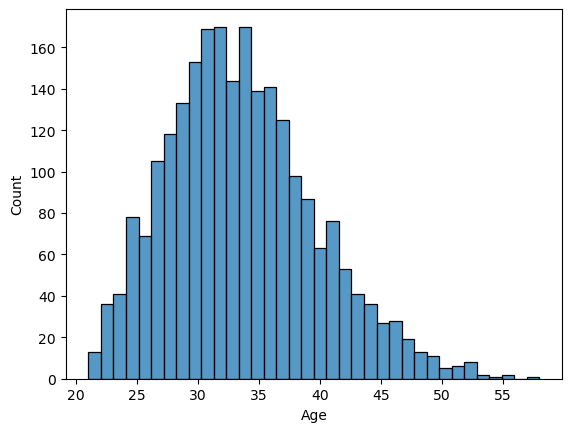

In [45]:
sns.histplot(df_grp['Age'])

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

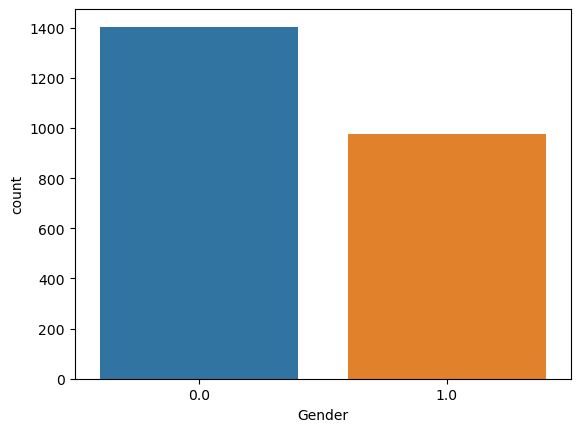

In [46]:
sns.countplot(df_grp['Gender'])

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating_Increase', ylabel='count'>

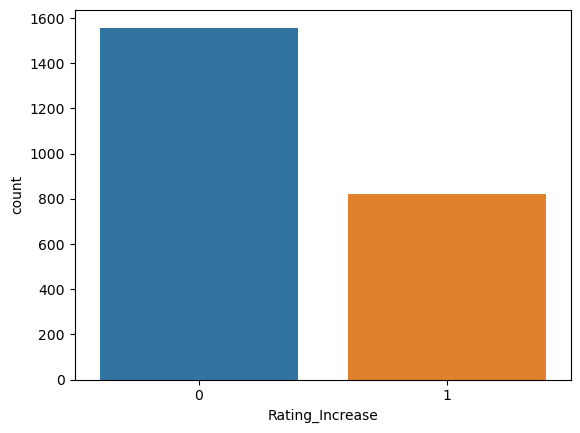

In [47]:
sns.countplot(df_grp['Rating_Increase'])

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating_Decrease', ylabel='count'>

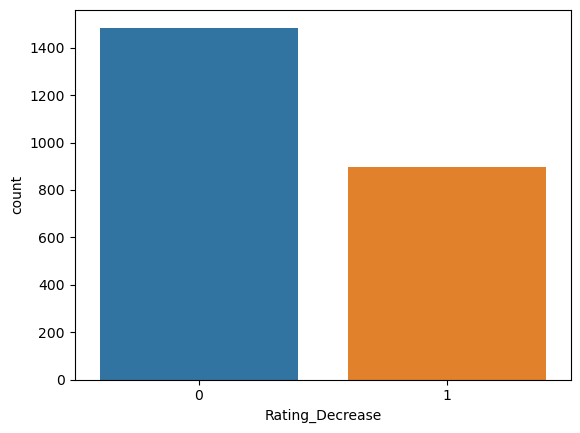

In [48]:
sns.countplot(df_grp['Rating_Decrease'])

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly_Income_Increase', ylabel='count'>

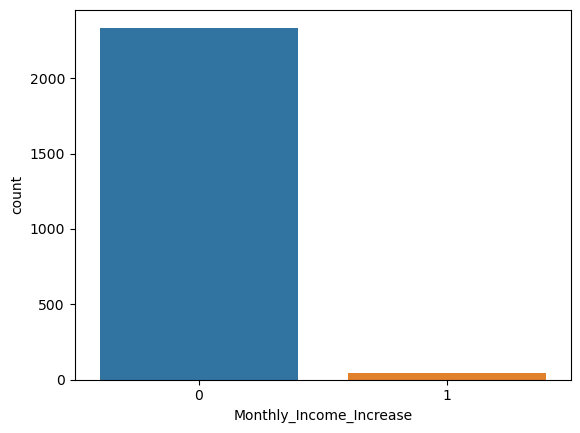

In [49]:
sns.countplot(df_grp['Monthly_Income_Increase'])

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education_Level', ylabel='count'>

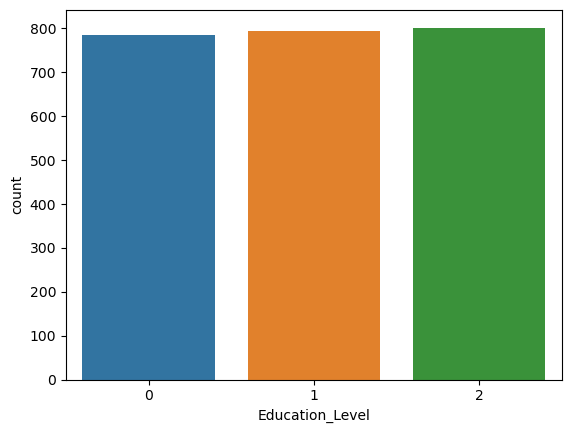

In [50]:
sns.countplot(df_grp['Education_Level'])

<AxesSubplot:xlabel='Income', ylabel='Count'>

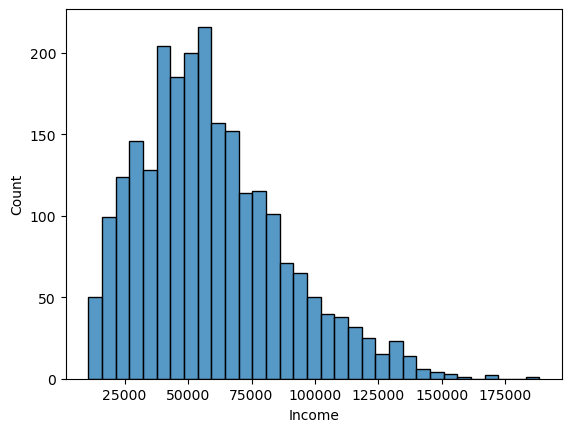

In [51]:
sns.histplot(df_grp['Income'])

<AxesSubplot:xlabel='tenure', ylabel='Count'>

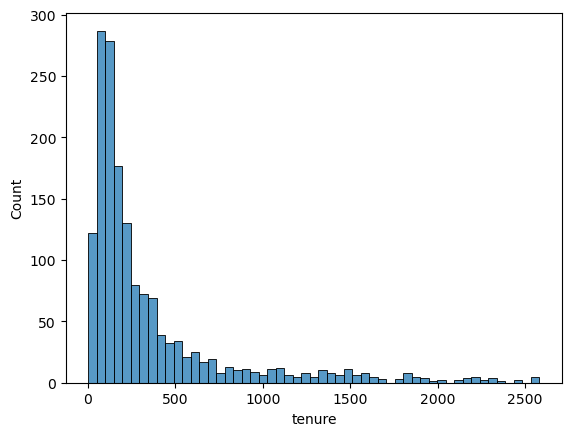

In [52]:
sns.histplot(df_grp[df_grp['tenure']!=0]['tenure'])
# during of the service

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Joining Designation', ylabel='count'>

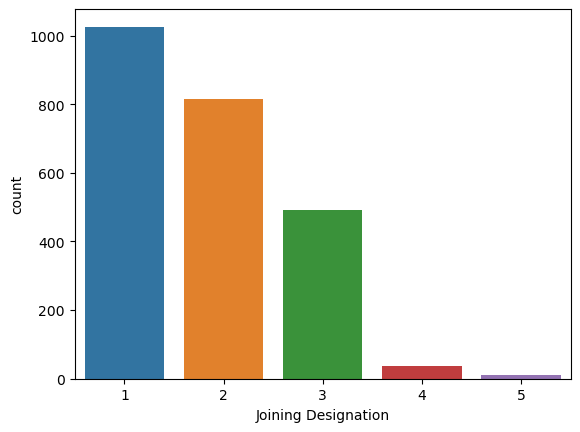

In [53]:
sns.countplot(df_grp['Joining Designation'])

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grade', ylabel='count'>

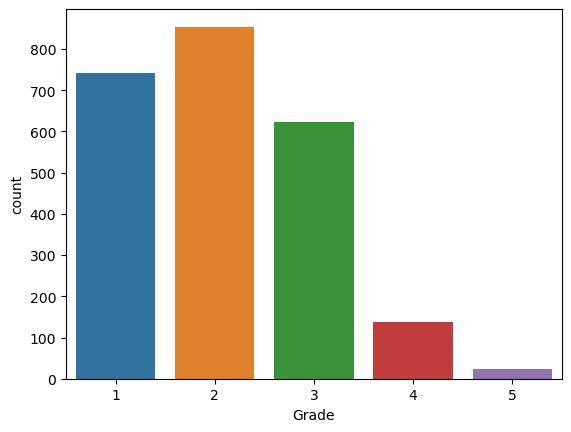

In [54]:
sns.countplot(df_grp['Grade'])

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

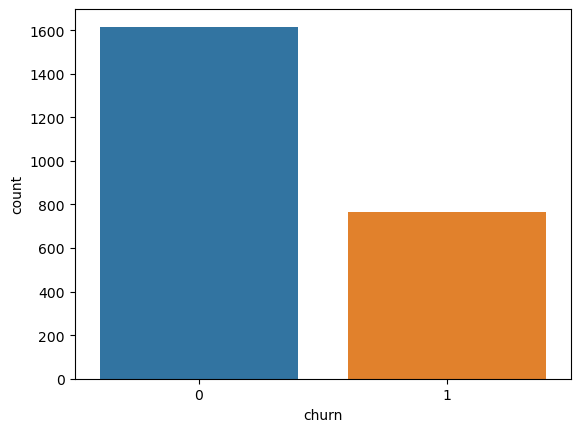

In [55]:
sns.countplot(df_grp['churn'])

### Bivariate Analysis

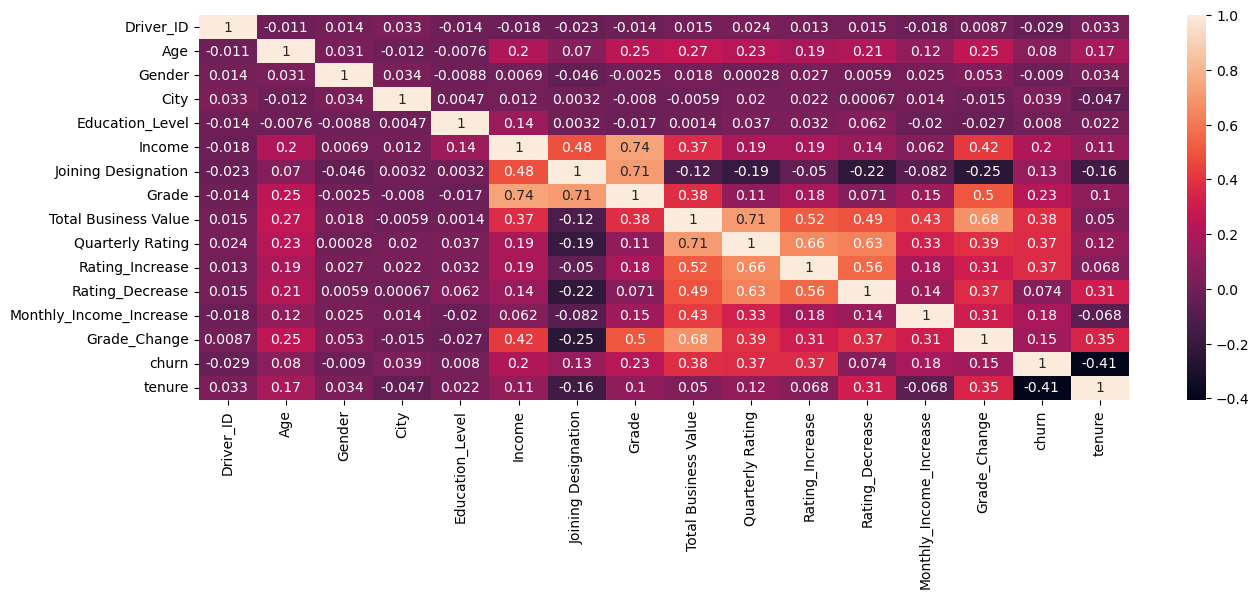

In [56]:
plt.figure(figsize=(15,5))
sns.heatmap(df_grp.corr(),annot=True)
plt.show()

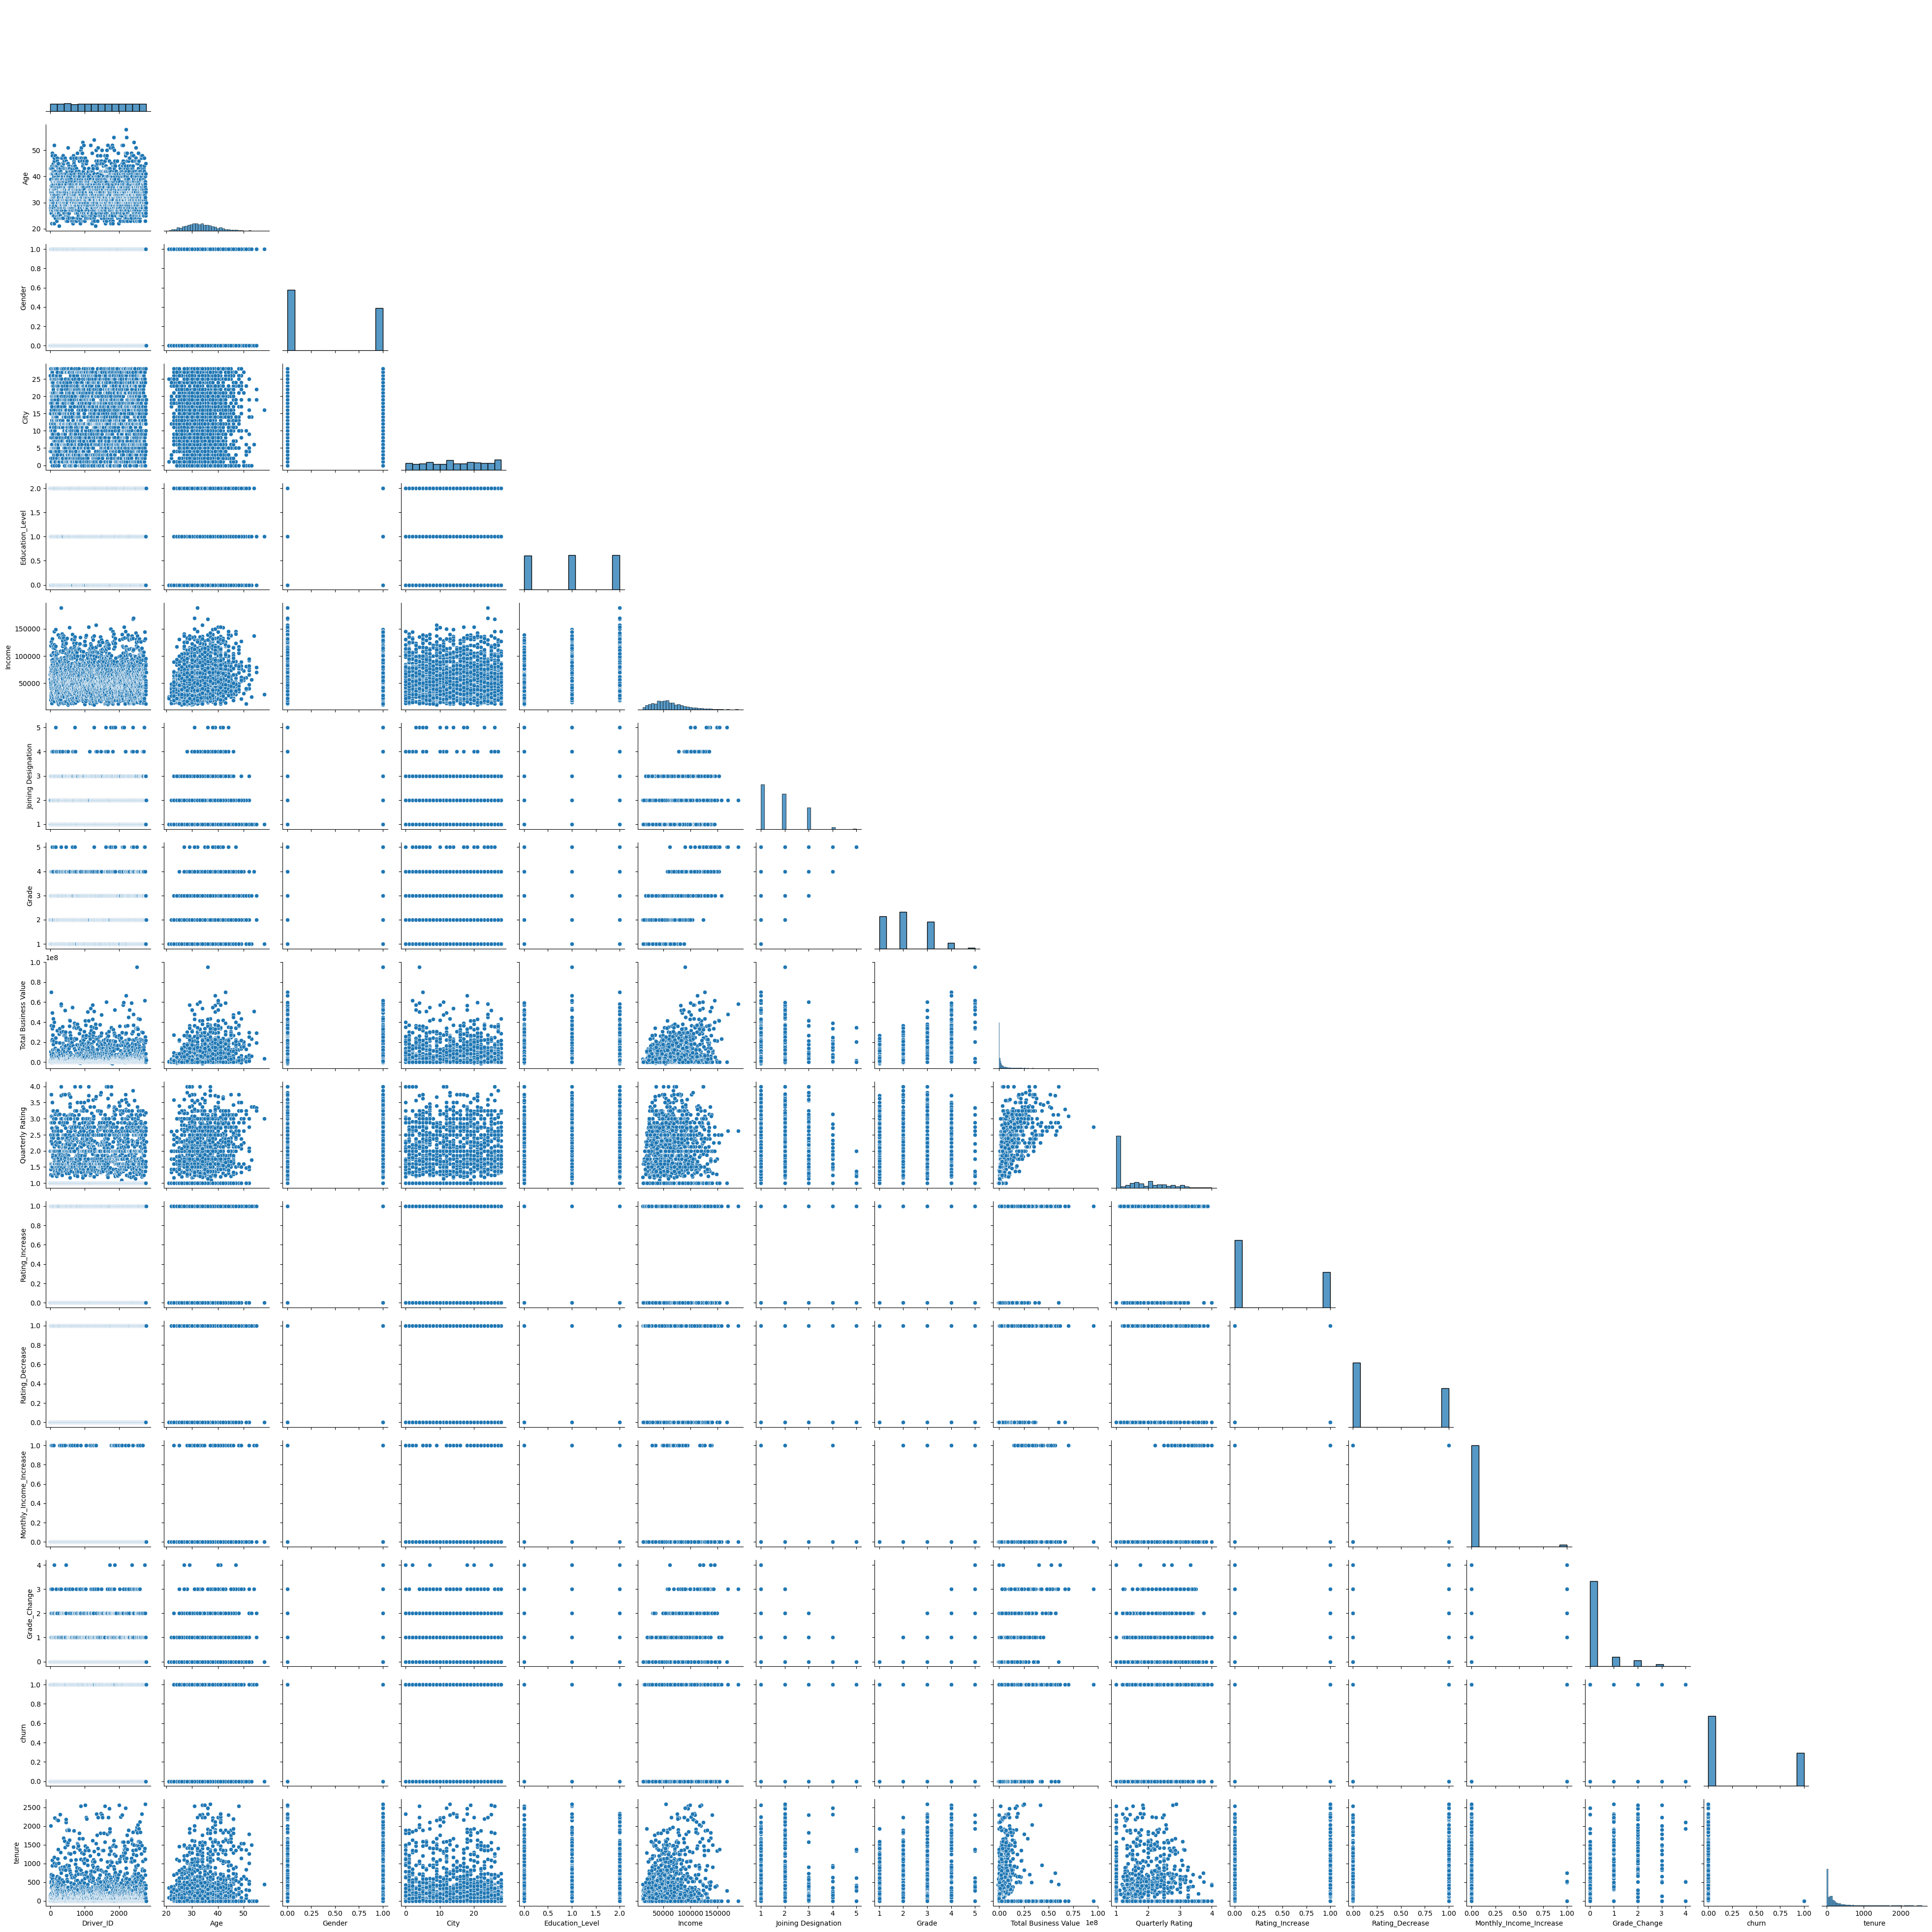

In [57]:
sns.pairplot(df_grp,corner=True)

### Insights from visual analysis

- Age is not normally distributed. More people are in the range of 30-35 years

- Male drivers are more than female drivers

- For almost 800 people their quaterly rating has increased

- For more 800 people their quaterly rating has decreased

- Monthly increased have barely increased for the drivers. This may be a major reason for churing

- There are almost same number of people for high and low educated people are working as drivers. 

- Income is left skwed. May need transformation

- People leaving the job, mostly left the before completing 400 days of work

- More people join at lower designation. Try giving higher designation when people with experience is joining

- Most people are in grade 2 designation

- Quaterly rating and Business value generate have high correlation

- Joining desingation and Grade have high correlation. Which means people are stuck in there initial grade

- Income and grade have high correaltion. So people are stuck in there first grade there income is also not rising

- If busineess values generated is high grade increased rapidly

- If busineess values generated is low grade can decrease

# Model Building

## Data Processing

In [58]:
df_grp.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Rating_Increase', 'Rating_Decrease',
       'Monthly_Income_Increase', 'Grade_Change', 'churn', 'tenure'],
      dtype='object')

In [59]:
df_grp.drop(columns=['tenure'],inplace=True)

In [60]:
# Data Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant

### Log tranfomation of income

In [61]:
df_grp['Income']=np.log(df_grp['Income'])

<AxesSubplot:xlabel='Income', ylabel='Count'>

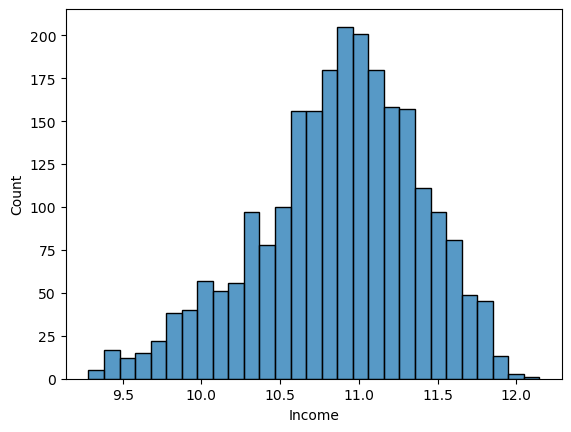

In [62]:
sns.histplot(df_grp['Income'])

### Outlier treatment

<AxesSubplot:ylabel='Income'>

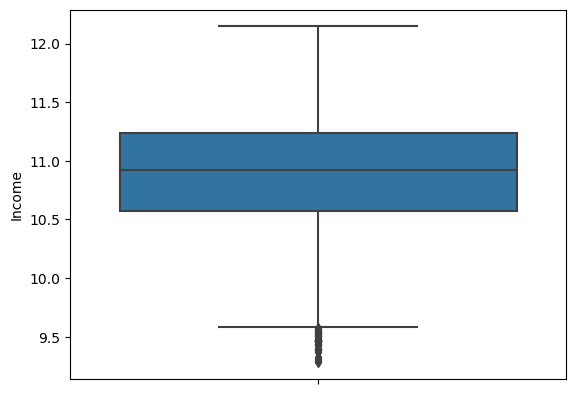

In [63]:
sns.boxplot(data=df_grp,y='Income')

In [64]:
Q1 = np.percentile(df_grp['Income'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df_grp['Income'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df_grp['Income'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

df_grp=df_grp[(df_grp['Income']>low_lim) & (df_grp['Income']<up_lim)]

C:\Users\gokul\AppData\Local\Temp\ipykernel_4860\2903179881.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df_grp['Income'], 25, interpolation = 'midpoint')
C:\Users\gokul\AppData\Local\Temp\ipykernel_4860\2903179881.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df_grp['Income'], 50, interpolation = 'midpoint')
C:\Users\gokul\AppData\Local\Temp\ipykernel_4860\2903179881.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'hi

### Independent and target feature split

In [65]:
y=df_grp['churn']
X=df_grp.drop(['churn'], axis=1)

In [66]:
X.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating_Increase,Rating_Decrease,Monthly_Income_Increase,Grade_Change
0,1,28.0,0.0,15,2,10.957573,1,1,1715580,2.0,0,0,0,0
1,2,31.0,0.0,26,2,11.112687,2,2,0,1.0,0,0,0,0
2,4,43.0,0.0,4,2,11.091377,2,2,350000,1.0,0,0,0,0
3,5,29.0,0.0,28,0,10.744365,1,1,120360,1.0,0,0,0,0
4,6,31.0,1.0,2,1,11.273754,3,3,1265000,1.6,1,0,0,0


### VIF Check

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\gokul\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
6,Joining Designation,inf
7,Grade,inf
13,Grade_Change,inf
5,Income,62.57
1,Age,36.78
9,Quarterly Rating,18.86
8,Total Business Value,4.50
0,Driver_ID,4.02
3,City,3.93
11,Rating_Decrease,3.03


In [68]:
X.drop(columns=['Joining Designation','Income','Grade','Quarterly Rating'],inplace=True)

In [69]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Age,8.10
0,Driver_ID,3.73
3,City,3.67
5,Total Business Value,3.30
7,Rating_Decrease,2.59
6,Rating_Increase,2.55
4,Education_Level,2.49
9,Grade_Change,2.21
2,Gender,1.69
8,Monthly_Income_Increase,1.26


### Test Train Split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

### Scaling - Using StandardScaler

In [71]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Handiling Imbalance data

In [72]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
X_val, y_val = sm.fit_resample(X_val, y_val)

## Model Building-1 (Bagging Algorithm)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model1=RandomForestClassifier()

In [75]:
model1.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
y_hat_train=model1.predict(X_train)
y_hat_val=model1.predict(X_val)

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [77]:
train_score=f1_score(y_train,y_hat_train)
val_score=f1_score(y_val,y_hat_val)
print(train_score,val_score)

1.0 0.6736842105263158


### Hyperparameter tuning

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
model=RandomForestClassifier()
parameters = {'n_estimators':[50,100,150,200],
              'criterion':['gini', 'entropy', 'log_loss'],
              'max_depth':[5,6,7,8,9,10],
              'min_samples_split':[4,5,6,7]
             }

In [80]:
clf = GridSearchCV(model, parameters, scoring = 'accuracy',cv = 3,n_jobs=-1)

In [81]:
clf.fit(X_val, y_val)


C:\Users\gokul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
288 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gokul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gokul\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\gokul\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\gokul\anaconda3\lib\site-packages

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [82]:
clf.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [83]:
model1_val=clf.best_estimator_

In [84]:
model1_val.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [85]:
y_hat_train=model1_val.predict(X_train)
y_hat_test=model1_val.predict(X_test)

In [86]:
train_score_f1=f1_score(y_train,y_hat_train)
test_score_f1=f1_score(y_test,y_hat_test)
print(train_score_f1,test_score_f1)

0.9238493723849373 0.6047619047619047


In [87]:
train_score=accuracy_score(y_train,y_hat_train)
test_score=accuracy_score(y_test,y_hat_test)
print(train_score,test_score)

0.927547770700637 0.7645390070921986


In [88]:
feature_improtance=pd.DataFrame(model1_val.feature_importances_,X.columns)
feature_improtance.sort_values(0)

,0
Monthly_Income_Increase,0.013941
Gender,0.018851
Grade_Change,0.047569
Education_Level,0.060319
Rating_Decrease,0.061729
Age,0.118673
Driver_ID,0.125464
City,0.133173
Rating_Increase,0.145645
Total Business Value,0.274635


In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_hat_test)

In [90]:
print('fpr, tpr, thresholds', fpr, tpr, thresholds)
print('precision, recall, thresholds',precision, recall, thresholds)

fpr, tpr, thresholds [0.         0.13807531 1.        ] [0.         0.55947137 1.        ] [0 1]
precision, recall, thresholds [0.32198582 0.65803109 1.        ] [1.         0.55947137 0.        ] [0 1]


### Precision Recall Curve

<AxesSubplot:>

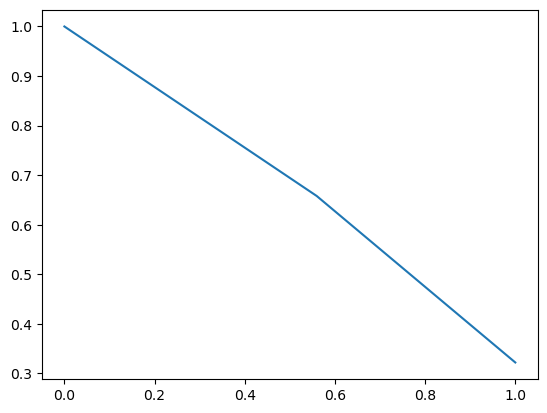

In [91]:
sns.lineplot(y=precision,x=recall)

### ROC AUC Curve 

<AxesSubplot:>

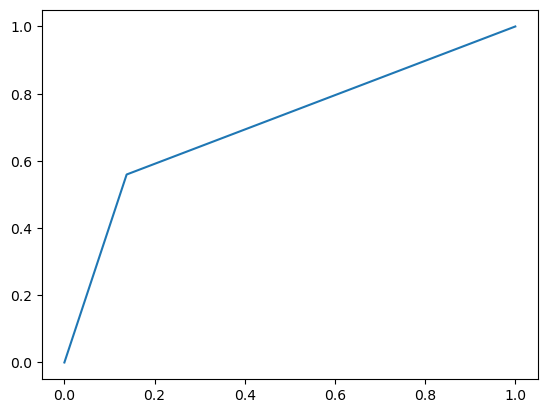

In [92]:
sns.lineplot(x=fpr,y=tpr)

### Classification Report 

In [93]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_hat_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.86      0.83       478
     class 1       0.66      0.56      0.60       227

    accuracy                           0.76       705
   macro avg       0.73      0.71      0.72       705
weighted avg       0.76      0.76      0.76       705



### Confusion matrix

In [94]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()

print((tn, fp, fn, tp))

(412, 66, 100, 127)


#### Comments on Metrics
- Area of precision recall curve is slightly above 0.5

- False negative are really large for this model

- Area under AUC Curve is largely 0.5

- After 0.5 trp for every increase in trp, there is a larger increade in fpr

- Accuracy of this model is aroung 76%

- F1 score of this model is around 0.60 which is really poor

## Model Building-2 (Boosting Algorithm)

In [95]:
import xgboost as xgb

In [96]:
model2 = xgb.XGBClassifier()
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [97]:
y_hat_train2=model1.predict(X_train)
y_hat_test2=model1.predict(X_test)

In [98]:
train_score=f1_score(y_train,y_hat_train2)
test_score=f1_score(y_test,y_hat_test2)
print(train_score,test_score)

1.0 0.5741626794258374


### Hyperparameter tuning

In [99]:
model=xgb.XGBClassifier()
parameters = {'subsample':[0.5,0.6,0.7,0.8,0.9,0.1],
              'lambda':[0.01, 0.1, 1],
              'alpha':[0.01, 0.1, 1],
              'eta':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
             }

In [100]:
clf = GridSearchCV(model, parameters, scoring = 'accuracy',cv = 3,n_jobs=-1)

In [101]:
clf.fit(X_val, y_val)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [102]:
clf.best_estimator_

XGBClassifier(alpha=0.01, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=0.1,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None, ...)

In [103]:
model2_val=clf.best_estimator_

In [104]:
model2_val.fit(X_train, y_train)

XGBClassifier(alpha=0.01, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=0.1,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None, ...)

In [105]:
feature_improtance=pd.DataFrame(model2_val.feature_importances_,X.columns)
feature_improtance.sort_values(0)

,0
Monthly_Income_Increase,0.012569
Driver_ID,0.045479
Gender,0.052563
City,0.054053
Age,0.054864
Education_Level,0.065184
Total Business Value,0.082039
Grade_Change,0.114659
Rating_Decrease,0.172166
Rating_Increase,0.346423


In [106]:
y_hat_train=model2_val.predict(X_train)
y_hat_test=model2_val.predict(X_test)

In [107]:
train_score_f1=f1_score(y_train,y_hat_train)
test_score_f1=f1_score(y_test,y_hat_test)
print(train_score_f1,test_score_f1)

0.9830234438156832 0.580046403712297


In [108]:
train_score=accuracy_score(y_train,y_hat_train)
test_score=accuracy_score(y_test,y_hat_test)
print(train_score,test_score)

0.98328025477707 0.7432624113475177


In [109]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_hat_test)

In [110]:
print('fpr, tpr, thresholds', fpr, tpr, thresholds)
print('precision, recall, thresholds',precision, recall, thresholds)

fpr, tpr, thresholds [0.         0.16527197 1.        ] [0.         0.55066079 1.        ] [0 1]
precision, recall, thresholds [0.32198582 0.6127451  1.        ] [1.         0.55066079 0.        ] [0 1]


### Precision Recall Curve

<AxesSubplot:>

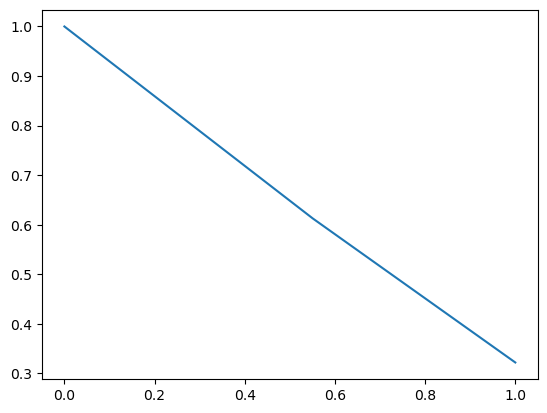

In [111]:
sns.lineplot(y=precision,x=recall)

### ROC AUC Curve 

<AxesSubplot:>

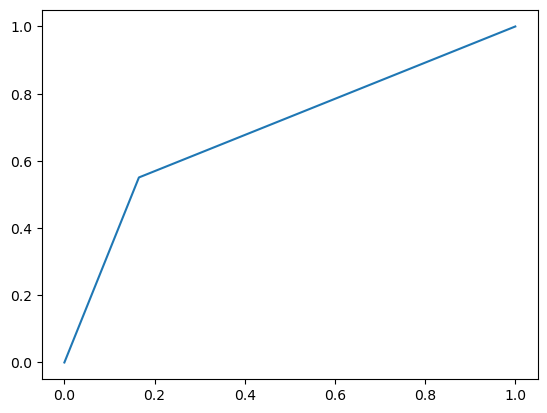

In [112]:
sns.lineplot(x=fpr,y=tpr)

### Classification Report 

In [113]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_hat_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.83      0.82       478
     class 1       0.61      0.55      0.58       227

    accuracy                           0.74       705
   macro avg       0.70      0.69      0.70       705
weighted avg       0.74      0.74      0.74       705



### Confusion matrix

In [114]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()

print((tn, fp, fn, tp))

(399, 79, 102, 125)


#### Comments on Metrics
- Area of precision recall curve is 0.5

- False negative are really large for this model

- Area under AUC Curve is more than 0.5

- After 0.5 trp for every increase in trp, there is a larger increade in fpr

- Accuracy of this model is aroung 75%

- F1 score of this model is around 0.58 which is really poor

## Actionable Insights

- Joining desingation and Grade have high correlation. Which means people are stuck in there initial grade

- Income and grade have high correaltion. So people are stuck in there first grade there income is also not rising

- Grade_Chang, Rating_Decrease, Rating_Increase, Total Business Value are the factors affecting the churn

- Accuracy of Bagging algorithm is coming as 80% whereas for boosting it is 68%

- After 500 days with the company churn rate decreases drastically

- City, age and gender contribute to less wrt to churing

## Recommendations

- Grade promotion critiria to relaxed

- Rating_Decrease critiria to be made stringent

- Steps to be take to improve the 

- Giving more incentives to the drivers during the initial stage with the company. Try to make them to stay for more than 650 days.

- Use random forest for prediction because it is computinally less expensive

- Use the random forest model to predict whether the person will chern or not and give incentives of grade change for those drivers

- Burden on driver for accuring business to be reduced.

- Training to improve the performace of the driver done inorder
